
# Introduction to Attention


##Learning Objectives:
_____________
By the end of the lesson, all learners will be able to (minimum expected from everyone) :

- Recall the drawbacks of sequence to sequence(seq2seq) networks

- Introduce long sequences and describe a mechanism to focus on each of the sequences instead of the last sequence output of the encoder 

- Discuss the mathematical implementations involved 

##Prerequisites:
_____
To start this lesson **all students must be aware** of the following concepts:

- Sequential Learning

- Encoder-Decoder Networks

- Seq2Seq Networks


## Drawbacks of vanilla seq2seq Architecture

Suppose that we have a sentence such as:

```The fire began in the kitchen and spread to the hotel dining room. Without warning, or perhaps just the one muffled cry of alarm, a ball of fire (yes, actually a ball) rolled through the arched and shuttered doorway from the kitchen, a sphere of moving color so remarkable, it was as though it had life and menace, when, of course, it did not — when, of course, it was simply a fact of science or of nature and not of God. ```

In this example, there is a long dependency of fire, that is being used in multiple contexts, like ```a sphere of moving color``` to represent ```ball of fire```, and the structure of the sentence is complex.

Despite sequence to sequence (seq2seq) architecture improving the neural machine translation tasks, the encoder-decoder architecture used in the seq2seq has some limitations. The encoders are responsible for compressing the input vector into a representation, which can model the information present in the input sequence of the network. The encoder-decoder sequence works well when the sequences are short as there is no long term dependencies. But, in the sentences like above the context vector at the final time step of an encoder is not able to capture the meaning properly. So, instead of taking only the final hidden state of an encoder, we take the sum of all the hidden states from the encoder and use them as context vector. That is, we do not focus on just the final state but provide attention to all the states.

The major drawback of the vanilla sequence to sequence architecture is that it does not perform well when the input sequences are large. It suffers from long term dependency problem.

So, the idea of an Attention mechanism is that it avoids single vector representation for each input sequences. Instead of this, it pays attention to particular input vectors on the basis of the attention weights. This definition may sound a little tricky, but we will elaborate this on the following blocks.


## Attention Mechanism

Consider an input sequence with 15 words. The number of hidden states we will have here is 15. In the seq2seq architecture, sum of all these hidden states are used to develop a context vector which is fed to the decoder and the target sentences are obtained. As discussed on the sequence to sequence (seq2seq) architecture previously, all the sequences sum and form a context vector. Looking at the context vector, the later words in the sequence have higher impacts on the context vector compared to the words that appeared at the begining of the sequence. Therefore, there is a need such that every words have equal impact on the context vector. For this, we assign attention weights based on the importance of a particular input sequence.

Let's suppose an example:

Input: $What$ $are$ $you$ $eating$ $?$  

Here, the attention should be given more on **eating** rather than "are", "you" or "what". Various attention weights are assigned to each input sequences based on their impact or role for on the target value. These attention weights carry contextual information to the decoders for translation. 

These contexts may be quite tricky, but we will understand this with the help of some figure illustrations along with mathematical calculations.


To explain the attention mechanism, we are going to take an example of a chatbot. A chatbot is a question answering type of implementation.

Here, we have LSTM cells on the encoder and decoder sides. What happens if we implement the chatbot using simple Encoder and Decoder architecture as following:

<div align="center">
<figure>


<p>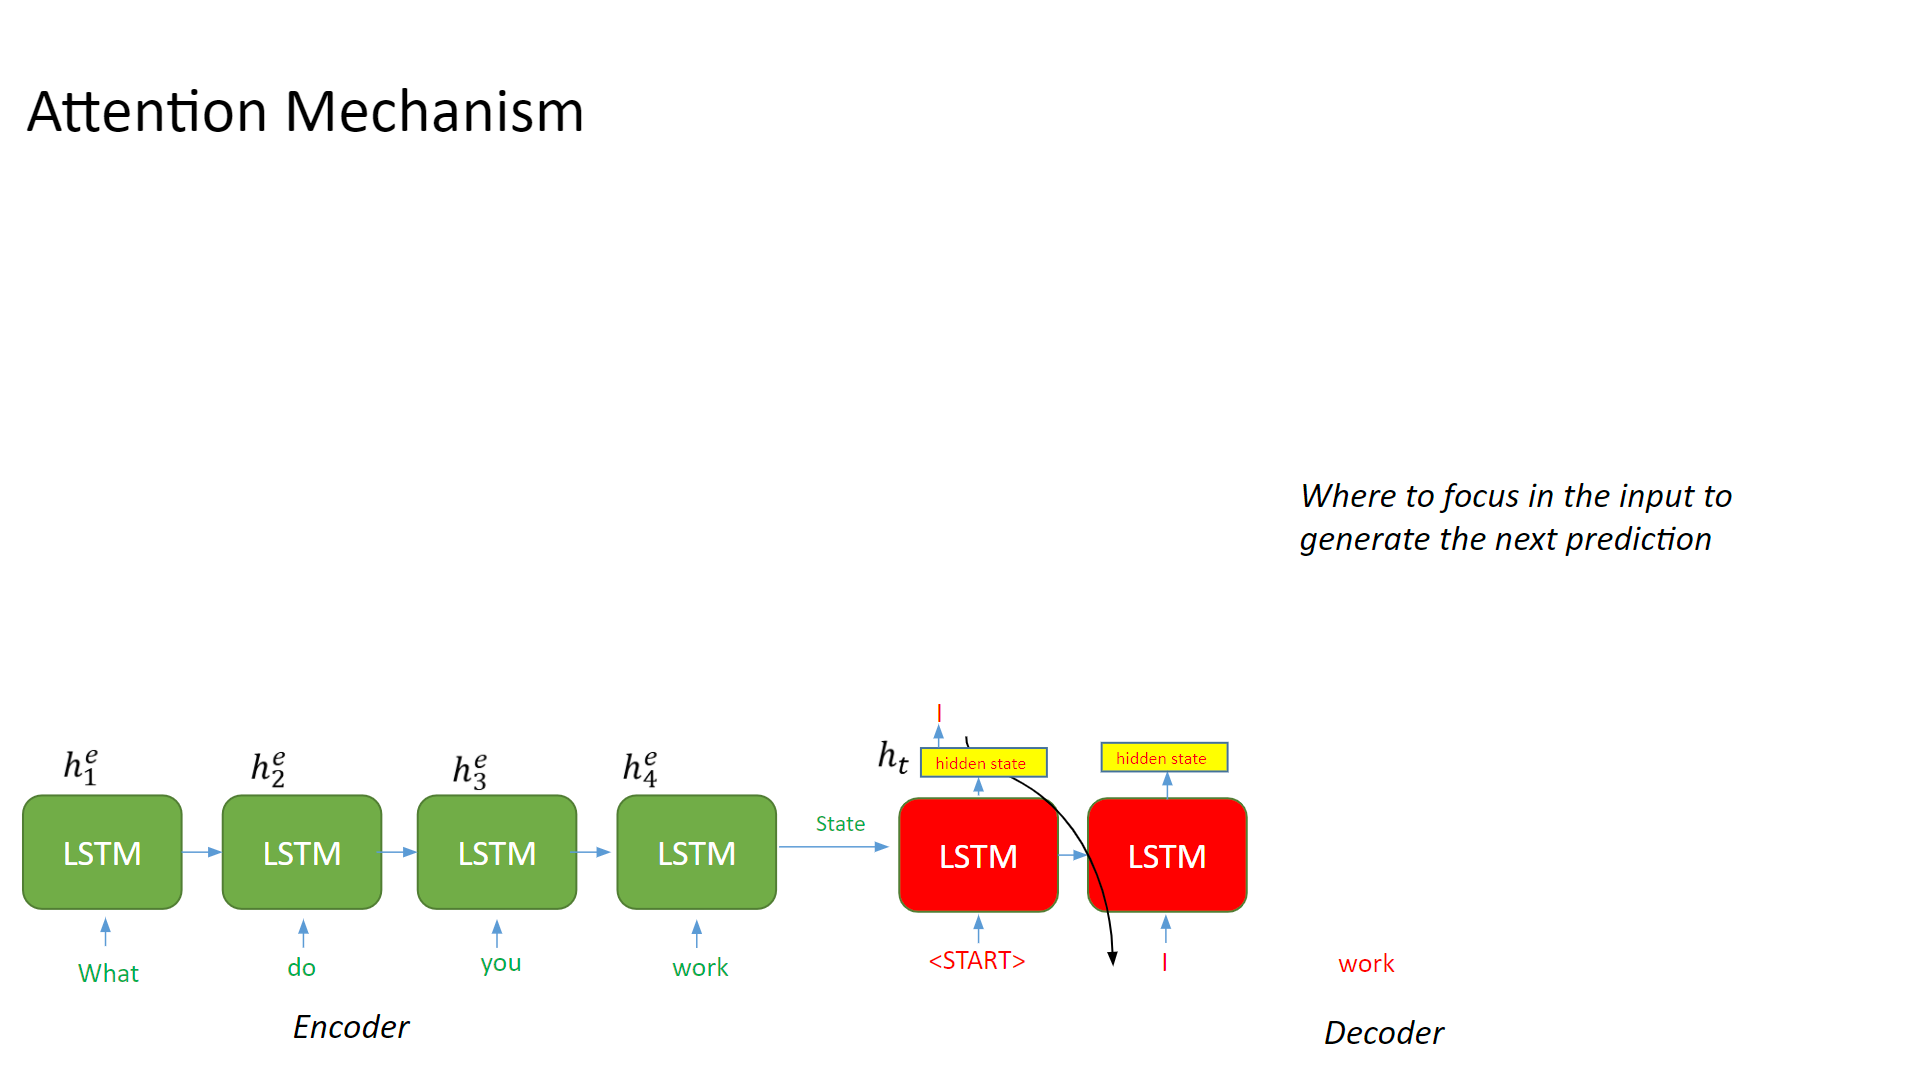</p>
<figcaption>Figure 1. Sequence to Sequence Architecture
</figcaption>
</figure>
</div>

In seq2seq encoder-decoder networks, the outputs of the hidden states are passed so on that the last hidden state from the encoder acts as an output of all the encoder hidden states. But, we already discussed that for a large sequence such networks suffer long term dependency problem. 


Surely, this is no better than the LSTM network using alone. We still face **vanishing gradient** problems because of the long term dependencies. Because of this reason, we apply a simple trick.




#### **Encoder Representations**

<div align="center">
<figure>


<p>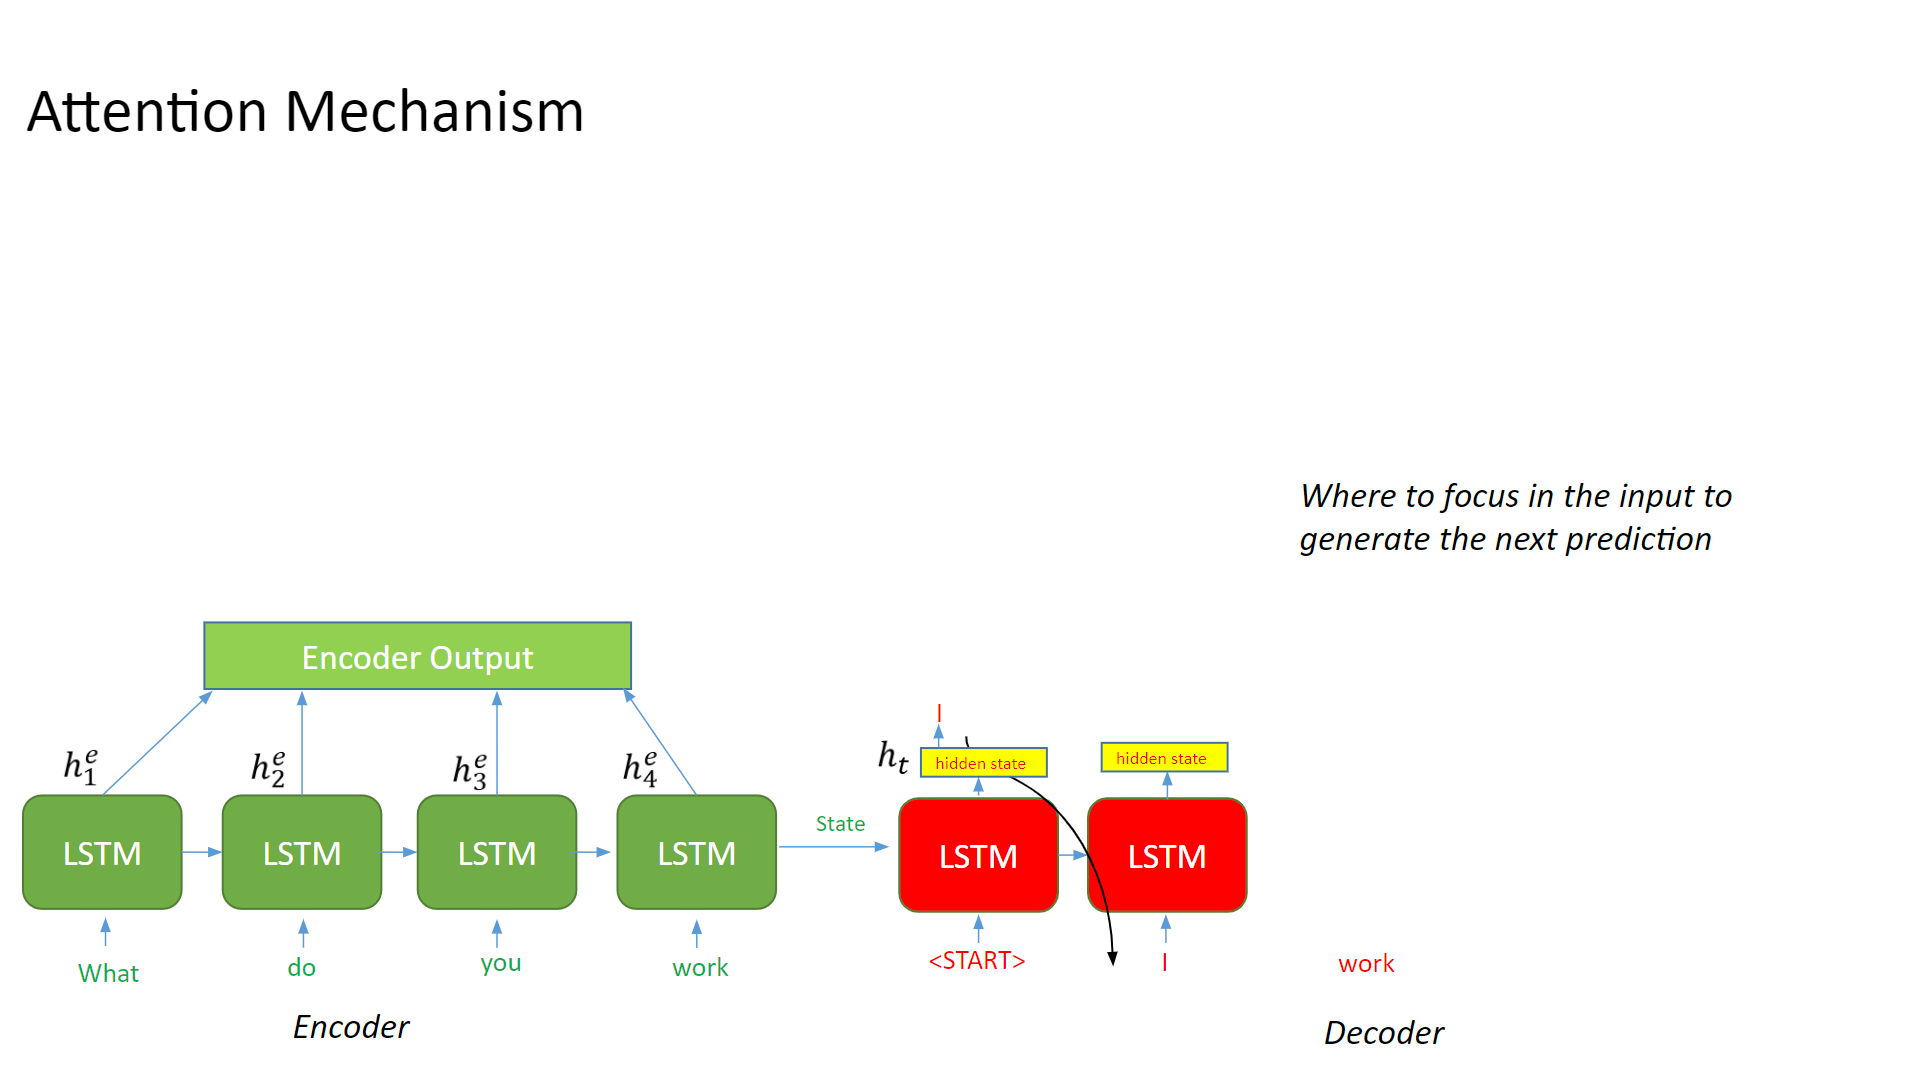</p>
<figcaption>Figure 2. Encoded Outputs from each cells in Encoder
</figcaption>
</figure>
</div>

We consider the outputs of all the encoder hidden states as Encoder Output. 

Now, since we have the encoder output of each hidden states, we can tell the decoder where to focus on in the next steps.


Now, as we can see the Encoder Output block is the overall independent representation or the concatenation of all the hidden states. In the Decoder network, we raise a Query to this Encoder output. We need to predict the output of the next hidden state on the decoder. Here, query is most suitable information that we seek among the encoder hidden states inorder to predict the next step on the decoder.


#### **Attention Operation and Weights Computation**
<div align="center">
<figure>


<p>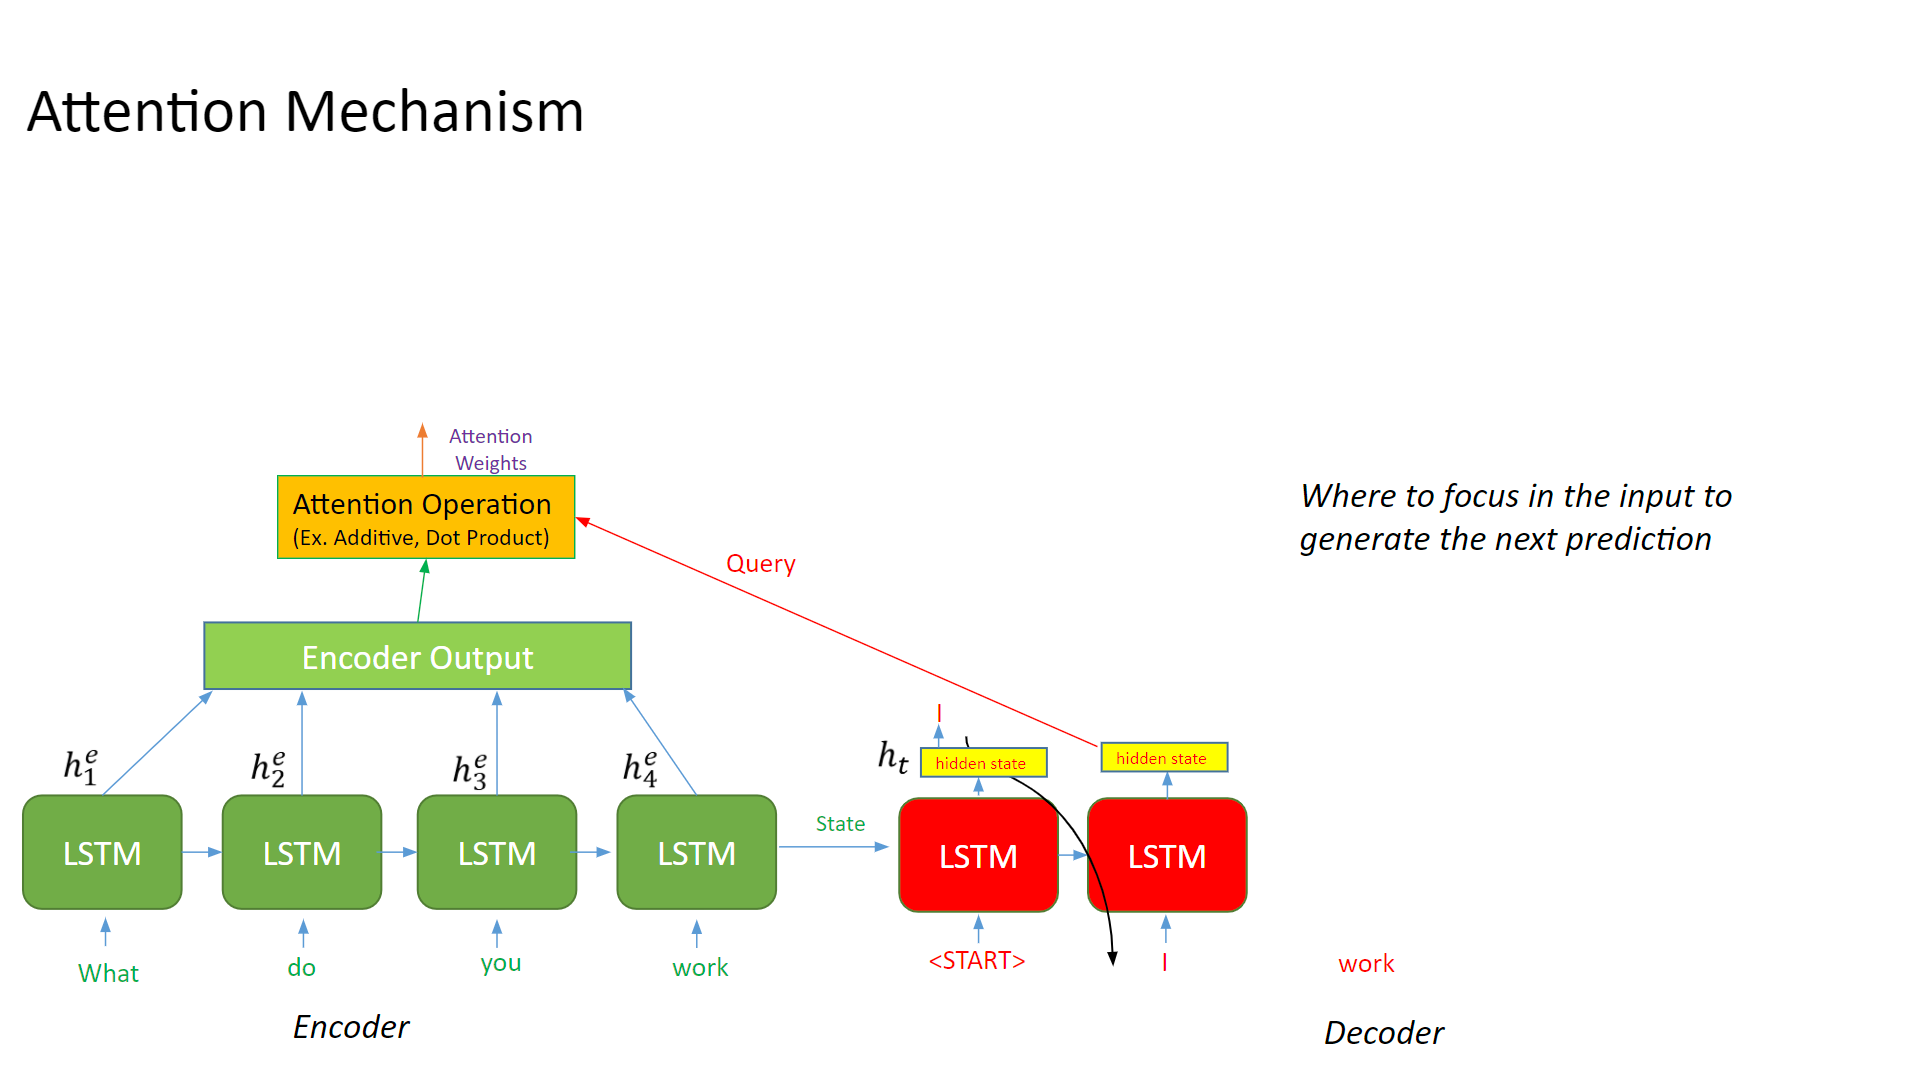</p>
<figcaption>Figure 3. Attention Operation
</figcaption>
</figure>
</div>


This operation is called attention because the aim of our Query is to figure out which output of hidden state should we focus on or give attention to. The attention operation is the Dot Products. With this operation, we generate the attention weights. Let's see the computation of attention weights then so that we can clear out the confusion.

<div align="center">
<figure>


<p>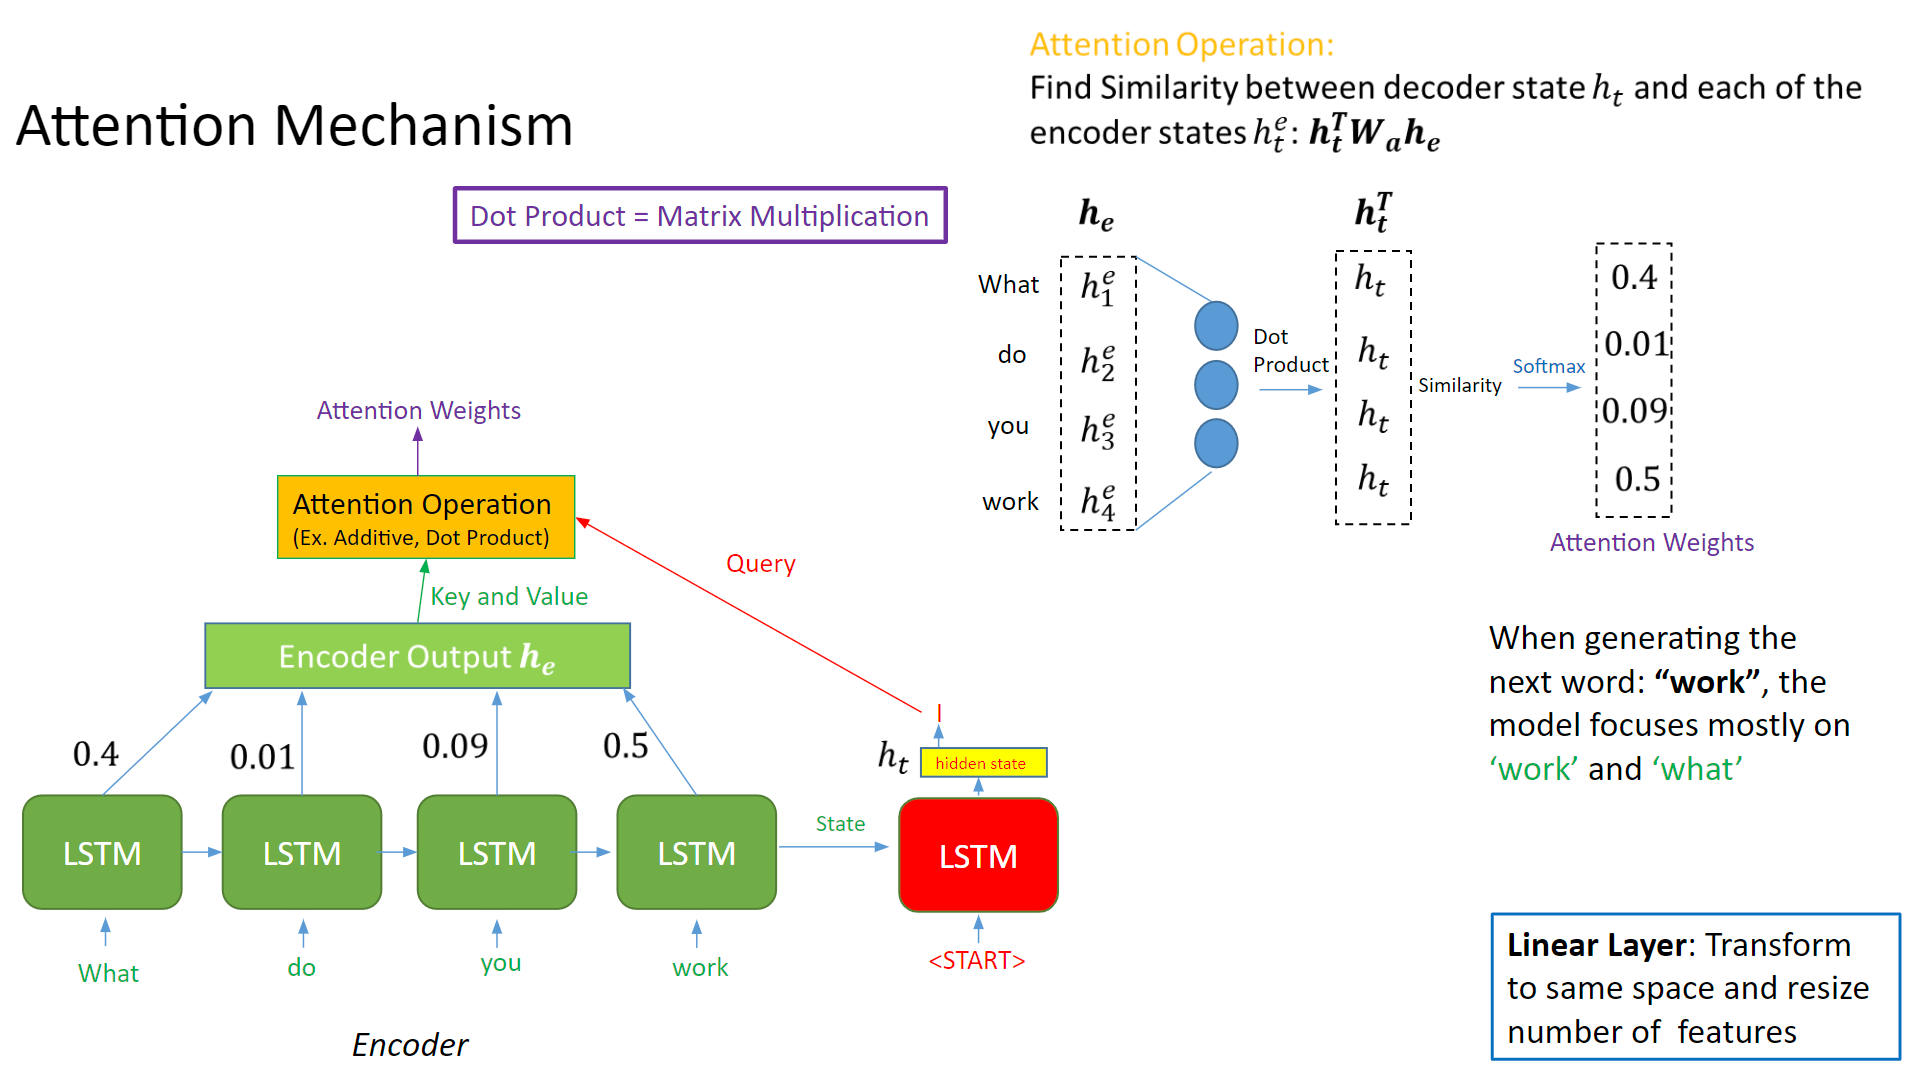</p>
<figcaption>Figure 4. Attention Weights Calculation
</figcaption>
</figure>
</div>

Since, the encoder output's length is the number of sequences in a sentence while the decoder output is single at a single time step. That is why, we expand the decoder output with the number of encoder outputs for dot product during the attention weights calculation as shown in Figure 4. To find the similarity of the decoder query with the encoder output, we perform the DOT product operation.

Moreover, we can see keys, values and query on Figure 4. The keys are the encoder representation and the values are what we want to multiply with the attention weights. While the Query are the ones generated by the decoder.
Here, the keys and the values are the samething.

As, our encoder input is **What do you work?** and our first decoder output is **I** so the other word after I should be **work** in a meaningful sentence. We can also see that **work** has the highest softmax value of 0.5. So, the model will more likely generate next word as **work** in the next time step. This is how we generate the attention weights.



#### **Context Vector**
Now, in the next step we multiply the encoder outputs with the attention weights and obtain the **Context Vector**. Context Vector is the weighted sum of all the encoder outputs.

<div align="center">
<figure>


<p>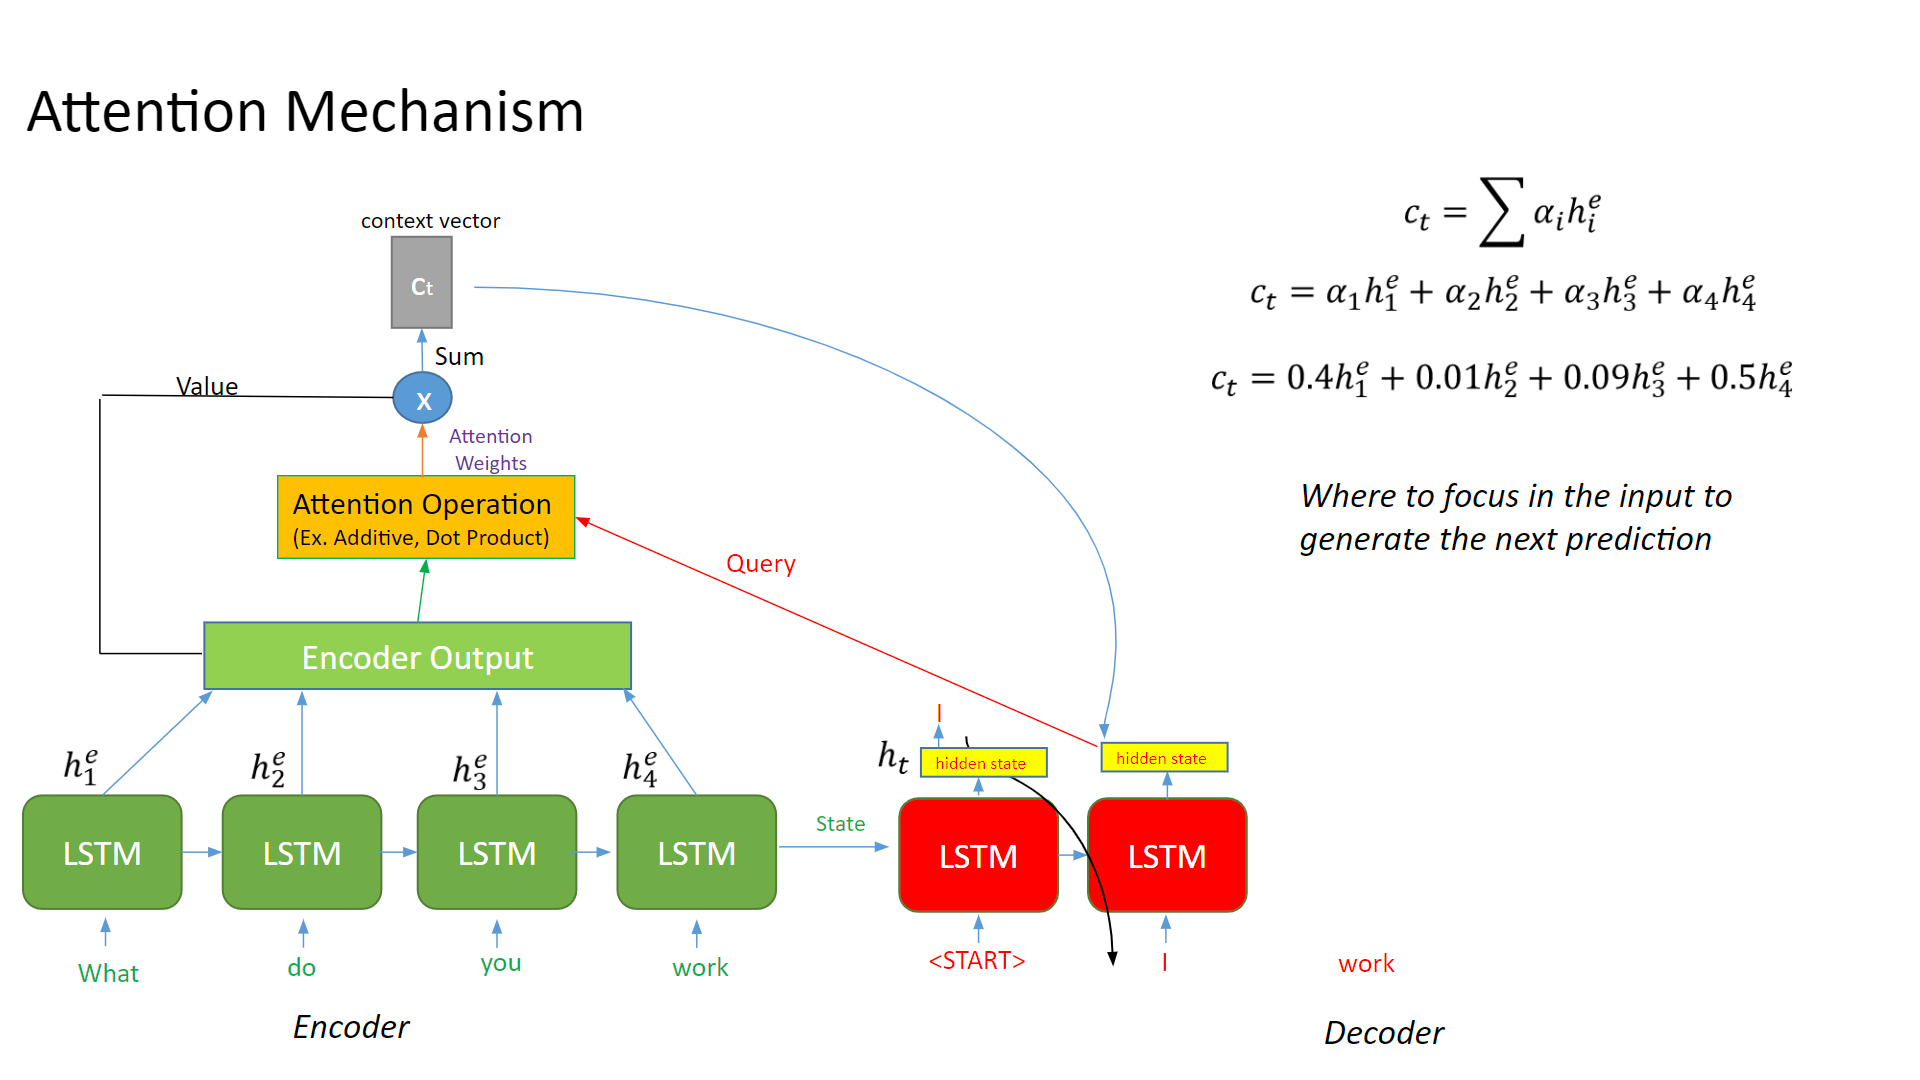</p>
<figcaption>Figure 5. Context Vector Computation and Concatenation
</figcaption>
</figure>
</div>

We have demonstrated the formula and the mathematical implementation to generate the context vector in the Figure 5.

After we obtain the context vector from the Encoder side, we concatenate the context vector to the decoder hidden states and generate the output from each decoder hidden states. In this way, we apply the attention mechanism. The major difference from the seq2seq network is that, we achieve context vector at each hidden time steps on the decoder based on which we predict the most relevant result from the decoder.

In an Attention Network, the keys are the encoder representation and the values are what we want to multiply with the attention weights. While the Query are the ones generated by the decoder.
Here, the keys and the values are the samething. However, on architectures like Transformers they are different.

In this way, we calculate the attention. Generally, for small sequences attention may work somehow similar to the seq2seq networks, but for long sequences, it really makes an impact on the result calculation which is why it is used in state of the art models like: BERT, GPT-3, etc.


## Mathematical Analysis


The output from the attention layer is a context vector $c_t$ which is computed as the sum of annotations, $(h_1^e, h_2^e, ...., h_j^e)$ represented in the encoder. The equation can be given by:

\begin{equation}
c_i = \sum_{i=1}^{T_x}\alpha_{i}h_i^e
\end{equation}

where, the weight $a_{i}$ of each annotation $h_i^e$ is computed by passing an alignment model into the softmax activation function. 

This softmax function assigns the probability to each of the weights from encoder hidden state up to position i based on the decoder states at position $j-1$


\begin{equation}
\alpha_{ij} = \frac{\text{exp}(e_{ij})}{\sum_{k=1}^{T_x}\text{exp}(e_{ik})}
\end{equation}

where, 

\begin{equation}
e_{ij} = a(s_{j-1}, h_j)
\end{equation}


The alignment function is calculated as:

$$
a(s_{j-1}, h_i^e) = v_{a}^\top \text{tanh}(W_as_{j-1} + U_ah_i^e)
$$

where, $W_a$ is the weights associated with the states in the decoder $s_{i-1}$, $U_a$ is the that updates the hidden layers in the encoder $h_i^e$ and $v_{a}$ are the weight that updates the attention layer. 

The alignment model takes in the decoder state at position $j-1$ and encoder hidden states at position $i$ to calculate the matching information for decoder state at position $i$. 

Using this attention layer, the network can learn probabilities that can represent the important parts of the sentence in the input sentence. 



## Various Attention Mechanisms

There are various attention mechanisms. Attention mechanisms are widely used in many fields of NLP. Among them **Bahdanau** and **Luong** attention are the two most classic attention mechanism.

Let’s discuss the differences between these classical attention mechanisms.

In the Bahdanau attention mechanism, the attention at time step $t$ is calculated using the decoder hidden state $h_{t-1}$ and each hidden states from the encoders. While, in the Luong Attention Mechanism, the attention at time step $t$ is calculated using the hidden state $t$ from the decoder and each hidden states from the encoder. This is one of the important difference between the **Bahdanau** and **Luong** Attention.

As discussed Luong attention mechanism uses hidden state of the current time step. This is considered logically more natural however it requires an additional layer of RNN decoder to calculate the output.

There are several alignment functions. Bahdanau Attention Mechanism paper showed it had only used the **concat** alignment function. While Luong uses **dot, general and concat** alignment functions to calculate the alignment score.

Let's have a look at the both the attention mechanisms and have a clear intuitive idea about these mechanisms:

<div align="center">
<figure>


<p>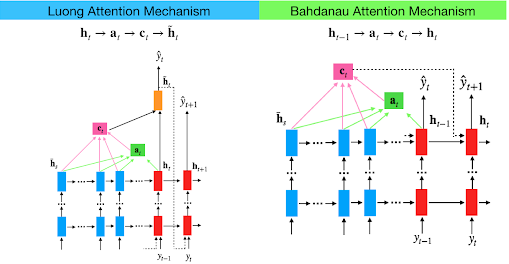</p>
<figcaption>Figure 6. Illustration of Luong and Bahdanau Attention
</figcaption>
</figure>
</div>


We can see in the Figure 6, that in the Luong Attention, for calculating the attention on the current time step, we use the current hidden time step decoder output while the Bahdanau uses the previous decoder hidden state output which can be illustrated clearly from the figure too.


# Takeaways
The main takeaways from this lesson are:

- Major drawback of the vanilla sequence to sequence architecture is that it does not perform well when the input sequences are large. It suffers from long term dependency problem.

- Attention mechanism avoids single vector representation of input sequences from the encoders. Instead of this, it pays attention to each particular input vectors on the basis of the attention weights.

- Attention operation is done between the encoder output and query raised by the decoder.

- Context vector obtained after attention mechanism is concatenated with the decoder time step to predict the next decoder time step.

- Using this attention layer, the network can learn probabilities that can represent the important parts of the sentence in the input sentence.


## References:
[1] [Cho, Kyunghyun, et al. "On the properties of neural machine translation: Encoder-decoder approaches." arXiv preprint arXiv:1409.1259 (2014). ](https://arxiv.org/abs/1409.1259)

[2] [Bahdanau, Dzmitry, Kyunghyun Cho, and Yoshua Bengio. "Neural machine translation by jointly learning to align and translate." arXiv preprint arXiv:1409.0473 (2014).](https://arxiv.org/abs/1409.0473)

[3] [Difference between Bahdanau and Luong Attention](https://www.programmersought.com/article/61243975730/)
